In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.signal import welch

import sys
sys.path.append('../../tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)
sys.path.append('../../tool_code/python_tool_code/frequency_dataset_generation/')

from DataPlot import Data_Load_Plot, Result_Plot, Result_Plot_paper, Loss_Plot
from Scaling import time_scaling, time_inv_scaling
from FFT_func import FFT

Contaminated_data.shape: (1000, 4000)
Clean_data.shape: (1000, 4000)


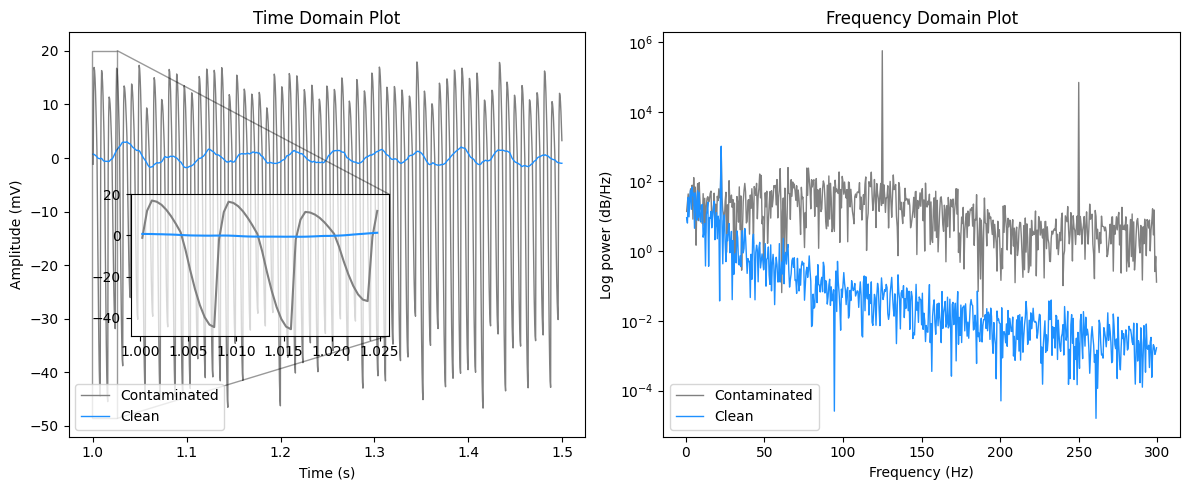

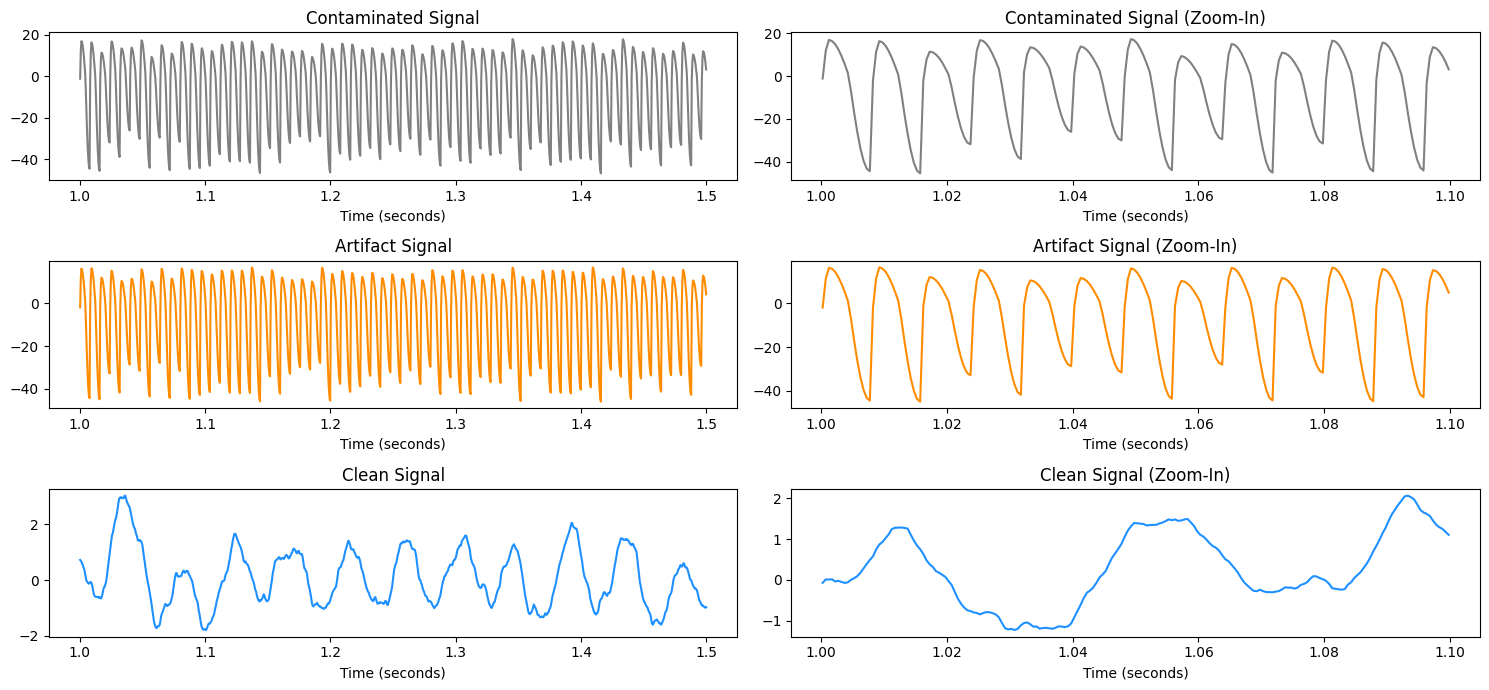

In [2]:
fpath = "../../data/synthetic_data/"
Contaminated, Clean, Artifact = Data_Load_Plot(fpath)

fs=2000

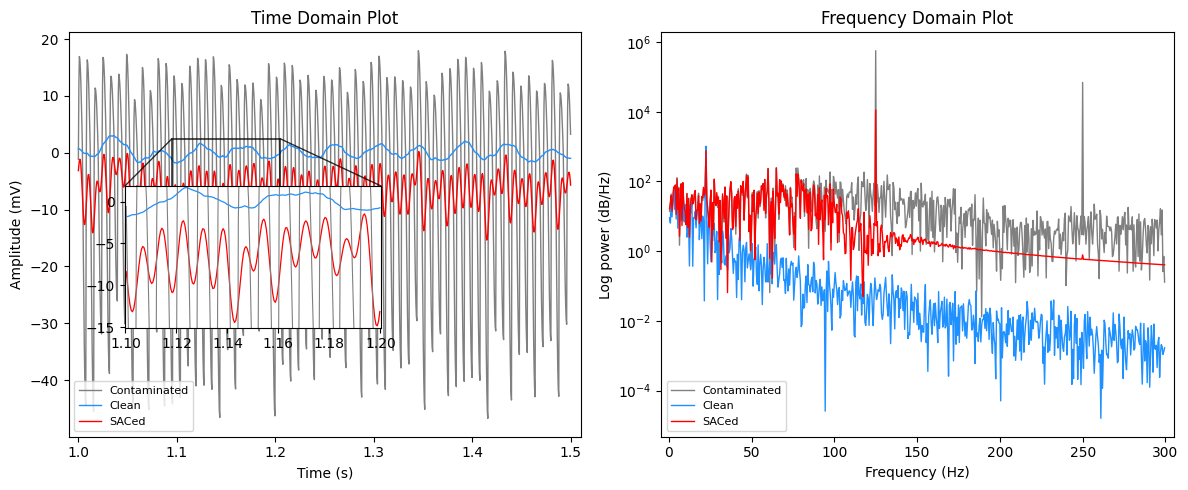

<Time Domain Error>
Mean Absolute Error: 6.6537
Mean Squared Error: 53.4745
<Frequency Domain Error>
Mean Absolute Error: 195.5564
Mean Squared Error: 62765614.9182


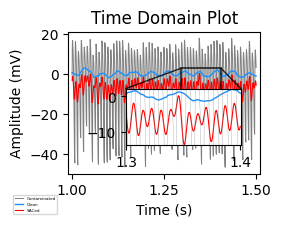

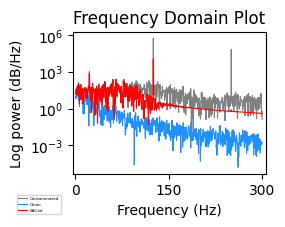

<Time Domain Error>
Mean Absolute Error: 6.6537
Mean Squared Error: 53.4745
<Frequency Domain Error>
Mean Absolute Error: 195.5564
Mean Squared Error: 62765614.9182


In [3]:
# Low Pass Filter
import numpy as np
from scipy.signal import butter, filtfilt

def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

LPFed = lowpass_filter(Contaminated, 100, fs)

save_path = '../../result/paper/'
save_title = 'LPF'

Result_Plot(Contaminated, LPFed, Clean, save_path, save_title) # inverse scaled data를 input으로 넣음
Result_Plot_paper(Contaminated, LPFed, Clean, save_path, save_title) # inverse scaled data를 input으로 넣음

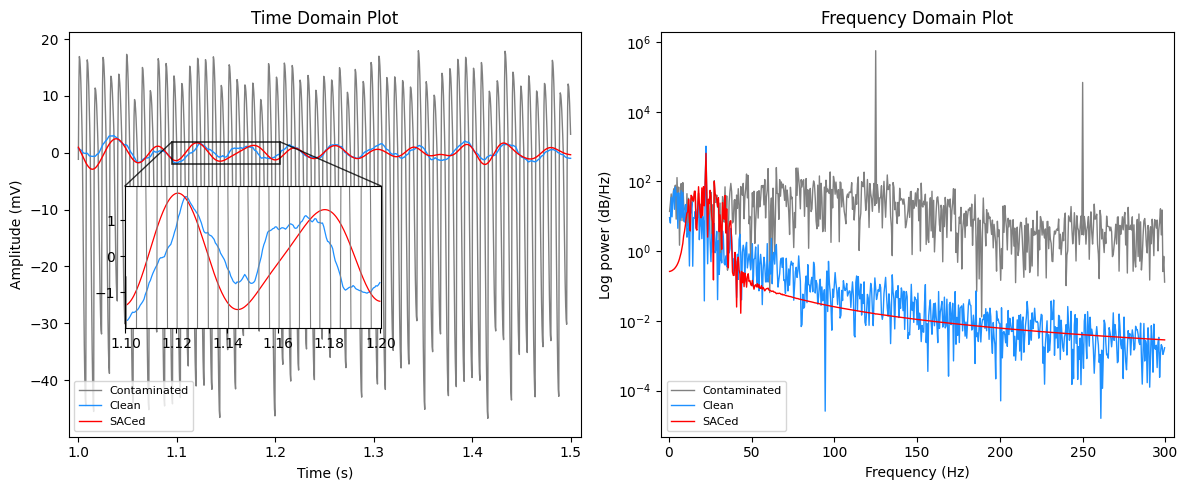

<Time Domain Error>
Mean Absolute Error: 0.7693
Mean Squared Error: 0.9783
<Frequency Domain Error>
Mean Absolute Error: 2.0013
Mean Squared Error: 303.351


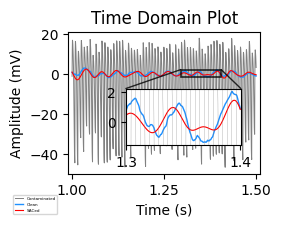

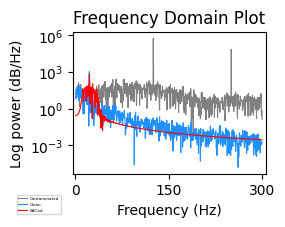

<Time Domain Error>
Mean Absolute Error: 0.7693
Mean Squared Error: 0.9783
<Frequency Domain Error>
Mean Absolute Error: 2.0013
Mean Squared Error: 303.351


In [4]:
# 대역통과 필터 함수 정의
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# 필터 적용
BPFed = bandpass_filter(Contaminated, 12, 35, fs)

save_path = '../../result/paper/'
save_title = 'BPF'

Result_Plot(Contaminated, BPFed, Clean, save_path, save_title) # inverse scaled data를 input으로 넣음
Result_Plot_paper(Contaminated, BPFed, Clean, save_path, save_title) # inverse scaled data를 input으로 넣음

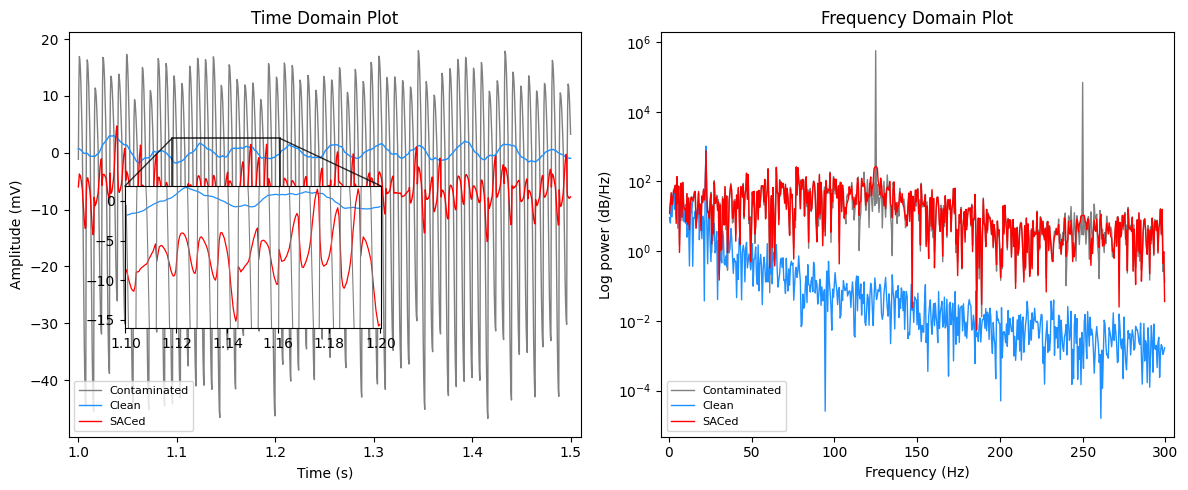

<Time Domain Error>
Mean Absolute Error: 6.6801
Mean Squared Error: 52.5407
<Frequency Domain Error>
Mean Absolute Error: 193.3319
Mean Squared Error: 61993289.0092


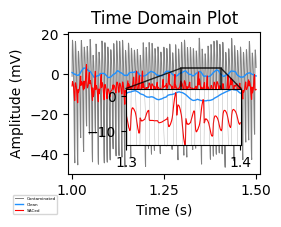

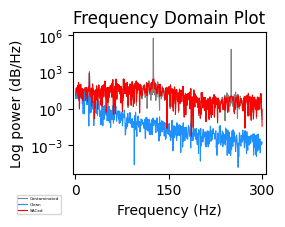

<Time Domain Error>
Mean Absolute Error: 6.6801
Mean Squared Error: 52.5407
<Frequency Domain Error>
Mean Absolute Error: 193.3319
Mean Squared Error: 61993289.0092


In [17]:
import numpy as np
from scipy.signal import iirnotch, filtfilt

# 노치 필터 설계 및 적용 함수
def notch_filter(data, notch_freqs, fs, quality_factor):
    Notched = data
    for notch_freq in notch_freqs:
        b, a = iirnotch(notch_freq, quality_factor, fs)
        Notched = filtfilt(b, a, Notched)
    return Notched

fundamental_freq = 125
harmonics = [fundamental_freq * i for i in range(1, int(fs/(2*fundamental_freq)) + 1)]  # 130Hz의 배수 계산

quality_factor = 30

Notched = notch_filter(Contaminated, harmonics, fs, quality_factor)

# 결과 Plot
save_path = '../../result/paper/'
save_title = 'Notch'

Result_Plot(Contaminated, Notched, Clean, save_path, save_title) # inverse scaled data를 input으로 넣음
Result_Plot_paper(Contaminated, Notched, Clean, save_path, save_title) # inverse scaled data를 input으로 넣음

In [6]:
# freqs,_,_,psd_sine_wave = FFT_resolved(sine_wave, fs, single_sided=False)
# freqs,_,_,psd_notched = FFT_resolved(Notched, fs, single_sided=False)

# # 결과 출력
# plt.figure(figsize=(10, 6))

# plt.subplot(2, 1, 1)
# plt.plot(t, sine_wave)
# plt.plot(t, Notched)
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.legend(['Original', 'Notched'])

# plt.subplot(2, 1, 2)
# plt.plot(freqs[1:600], np.log10(psd_sine_wave[0][1:600]))
# plt.plot(freqs[1:600], np.log10(psd_notched[0][1:600]))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power')
# plt.legend(['Original', 'Notched'])

# plt.tight_layout()
# plt.show()